In [184]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as ptr
from sklearn.cluster import KMeans
from sklearn import preprocessing 

In [185]:
data= pd.read_csv('income.csv')
del data['Name']

In [186]:
data.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


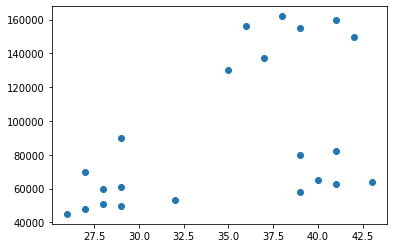

In [187]:
ptr.scatter(data['Age'], data['Income($)'])

In [199]:
#train the model
model= KMeans(n_clusters= 3)

a= model.fit_predict(data[['Age', 'Income($)']])

a

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [200]:
data['cluster']= a 

In [201]:
data.head()

,Age,Income($),cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,2


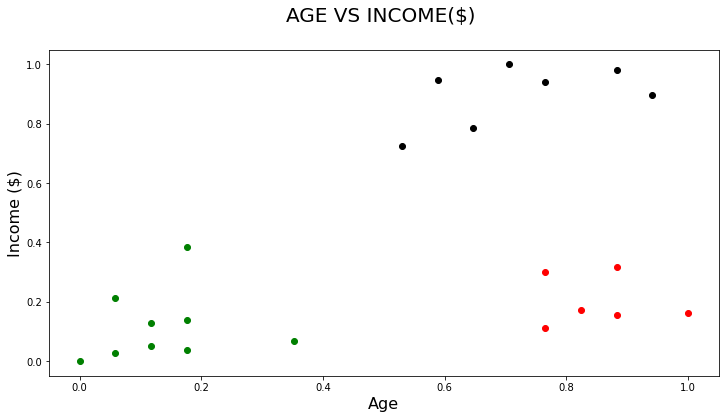

In [202]:
#now we can seperate all the 3 clusters and plot them 
d0= data[data.cluster==0]
d1= data[data.cluster==1]
d2= data[data.cluster==2]

#Now Plot the three again

ptr.figure(figsize=(12, 6))

ptr.title('AGE VS INCOME($) \n', fontsize= 20)

ptr.xlabel('Age', fontsize= 16)
ptr.ylabel('Income ($)', fontsize= 16)

ptr.scatter(d0['Age'], d0['Income($)'], color= 'red')
ptr.scatter(d1['Age'], d1['Income($)'], color= 'green')
ptr.scatter(d2['Age'], d2['Income($)'], color= 'black')

ptr.show()

#as you can notice the unevenness, it is beacuse the
#scaling is not correct

#we need to use the correct scaling, so we can use minmax scaler using
#sklearn.prepocessing  

In [203]:
# Now we have scaled all the values with
# with values b/w 0 and 1 

scaler= preprocessing.MinMaxScaler()
scaler.fit(data[['Age']])
data[['Age']]= scaler.transform(data[['Age']])

scaler.fit(data[['Income($)']])
data[['Income($)']]= scaler.transform(data[['Income($)']])

data.head()

,Age,Income($),cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,2


In [204]:
model= KMeans(n_clusters= 3)

a= model.fit_predict(data)

data['cluster']= a

data.head()


,Age,Income($),cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,2
3,0.117647,0.128205,2
4,0.941176,0.897436,1


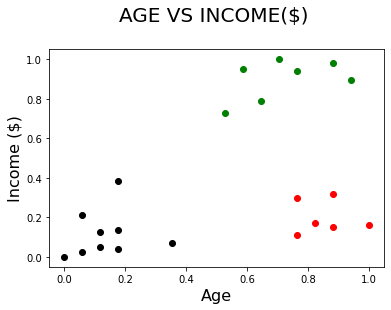

In [205]:
d0= data[data.cluster==0]
d1= data[data.cluster==1]
d2= data[data.cluster==2]

#Now Plot the three again

ptr.title('AGE VS INCOME($) \n', fontsize= 20)

ptr.xlabel('Age', fontsize= 16)
ptr.ylabel('Income ($)', fontsize= 16)

ptr.scatter(d0['Age'], d0['Income($)'], color= 'red')
ptr.scatter(d1['Age'], d1['Income($)'], color= 'green')
ptr.scatter(d2['Age'], d2['Income($)'], color= 'black')


ptr.show()

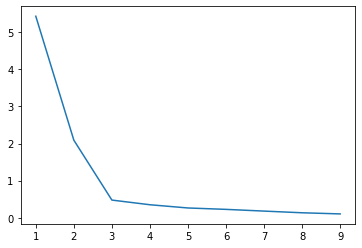

In [207]:
sse= []

x= range(1, 10)

for i in x:
    model= KMeans(n_clusters=i)
    model.fit_predict(data[['Age', 'Income($)']])
    error= model.inertia_
    sse.append(error)

ptr.plot(x, sse)